In [34]:
import numpy as np
import PIL.Image
import IPython.display
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time

class Couette():
    '''
    Esta clase es la encargada de crear la matriz 'A' y vectores 'x' y 'b'
    además de solucionar el conjunto de ecuaciones lineales derivadas del 
    método de diferencias finitas de forma adimensional
    El tamaño debe coincidir con el número de incógnitas y ecuaciones lineales
    n se refiere al número de nodos usados en la simulación
    Re es el número de Reynolds que se usará en la simulación
    k se refiere al valor del gradiente de presión constante en la dirección x
    '''
    
    def __init__(self, n, Re, k, iteraciones=0, criteria = 1):
        self.n = n
        self.MA = np.zeros((n,n))
        self.x  = np.zeros((n,1))
        self.b  = np.zeros((n,1))
        self.R = np.zeros((n,1))
        self.ax = np.zeros((n,1))
        
        self.array_iter = []
        self.criteria = criteria * (1e-3)
        self.iteraciones = iteraciones
        
        self.k = k
        self.Re = Re
        self.dy = 1/(n-1)
        
        self.res = []
        
        self.y = []
        
        for i in range(self.n):
            self.y.append(i*self.dy)
        
    def cM(self):
        '''
        Construcción de la matriz a partir de condiciones
        de frontera y construcción de los
        vectores que auxilian en el método numérico
        '''
        #ecuaciones lineales para nodos intermedios
        for i in range(1, self.n - 1):
            self.MA[i][i] = -2
            self.MA[i][i+1] = 1
            self.MA[i][i-1] = 1
        
        #ecuaciones para nodos inicial y final
        self.MA[0][0] = 1
        self.MA[self.n-1][self.n-1] = 1
        
        # Construcción Vector b
        for i in range(1, self.n-1):
            self.b[i] = self.Re * self.k * (self.dy)**2
        
        #CF de velocidad cte. en y=0
        self.b[0] = 0
        
        #CF de velocidad cte. en y=h
        self.b[self.n-1] = 1
        
    def jacobi(self, iteraciones):
        """
        Método que soluciona la matriz usando el método de Jacobi y un
        número de iteraciones dado, no usa criterio de convergenia
        """
        
        #llamada al método que construye la matriz
        self.cM()
        
        self.res = []
        
        for t in range(iteraciones):
        
            self.array_iter.append(t)
            
            for i in range(len(self.R)):
                sumaij = 0
                for j in range(len(self.R)):
                    sumaij += self.MA[i][j] * self.x[j]
                self.ax[i] = sumaij

                self.R[i] = self.b[i] - self.ax[i]
            
            # Guardamos el vector x^(k)
            a = self.x * 100
            #a = self.x[int(self.n/2)] *100
            #print(a)
            
            for i in range(len(self.x)):    
                self.x[i] = self.x[i] + self.R[i]/self.MA[i][i]
            
            # Guardamos el nuevo vector x^(k+1)
            b = self.x * 100
            #b = self.x[int(self.n/2)] *100
            #print(b)
            
            c = np.max(abs(a-b)) 
            res = c/np.max(abs(b))
            
            self.res.append( res )
            
    def jacobi_criteria(self):
        """
        Método que soluciona la matriz usando el método de Jacobi y un criterio de convergencia * (1e-3)
        """
        self.cM()
        
        self.res = []
        
        res_criteria = 10
        
        t = 0
        
        while res_criteria > self.criteria:
        
            t += 1
            self.array_iter.append(t)
            
            for i in range(len(self.R)):
                sumaij = 0
                for j in range(len(self.R)):
                    sumaij += self.MA[i][j] * self.x[j]
                self.ax[i] = sumaij

                self.R[i] = self.b[i] - self.ax[i]
            
            # Guardamos el vector x^(k)
            a = self.x * 100
            #a = self.x[int(self.n/2)] *100
            #print(a)
            
            for i in range(len(self.x)):    
                self.x[i] = self.x[i] + self.R[i]/self.MA[i][i]
            
            # Guardamos el nuevo vector x^(k+1)
            b = self.x * 100
            #b = self.x[int(self.n/2)] *100
            #print(b)
            
            c = np.max(abs(a-b)) 
            res = c/np.max(abs(b))
            
            self.res.append( res )
            
            res_criteria = self.res[-1]
        
    
    def graf_perfil(self):
        """Método que calcula y grafica el perfil de velocidades
        """
        
        if self.iteraciones == 0:
            self.jacobi_criteria()
        else:
            try:
                self.jacobi(self.iteraciones)
            except:
                print("Parece que el número de iteraciones deseado no es válido")
        
        # Cambiar esta parte para el experimento dado, la etiqueta nombra la variable que variamos
        plt.plot(self.x, self.y, label = f"Re = {self.Re}")
        
        plt.xlabel('Velocidad u* [1]')
        plt.ylabel('Altura y* [1]')
        plt.title('Perfil de velocidades con número de Reynolds variable')
        
        plt.legend()
        leg = plt.legend(loc = 4, ncol = 2, prop = {'size':11})
    
    def graf_res(self):
        """Método que calcula el perfil de velocidades y grafica el residual
        """
        
        if self.iteraciones == 0:
            self.jacobi_criteria()
        else:
            try:
                self.jacobi(self.iteraciones)
            except:
                print("Parece que el número de iteraciones deseado no es válido")
        
        plt.plot(self.array_iter, self.res)
        
        plt.xlabel('Iteraciones')
        plt.ylabel('Residual')
        plt.title('Residual vs Iteraciones')
        


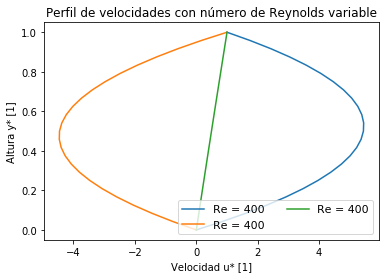

In [28]:
# a) Perfil de velocidad para gradientes de presi´on: (< 0), (= 0) y (> 0).

P1 = Couette(25, 400, -0.1, criteria=0.1)
P2 = Couette(25, 400, 0.1, criteria=0.1)
P3 = Couette(25, 400, 0, criteria=0.1)

P1.graf_perfil()
P2.graf_perfil()
P3.graf_perfil()

#plt.savefig('Comparación gradientes de presión.png')

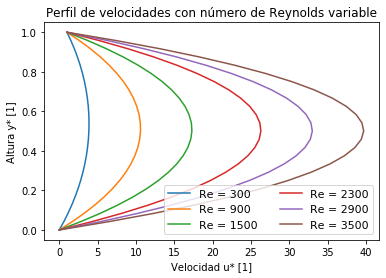

In [31]:
# b) Estudiar el efecto del n´umero de Reynolds, considerar que es flujo laminar.

Re1 = Couette(25, 300, -0.1)
Re2 = Couette(25, 900, -0.1)
Re3 = Couette(25, 1500, -0.1)
Re4 = Couette(25, 2300, -0.1)
Re5 = Couette(25, 2900, -0.1)
Re6 = Couette(25, 3500, -0.1)

Re1.graf_perfil()
Re2.graf_perfil()
Re3.graf_perfil()
Re4.graf_perfil()
Re5.graf_perfil()
Re6.graf_perfil()

#plt.savefig('Comparación número de Reynolds.png')

[0.3125, 7.8125, 19.015625, 36.203125, 43.765625, 63.328125]

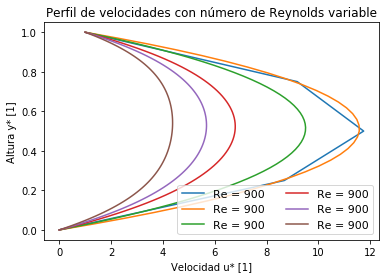

In [32]:
# c) Densidad de malla

time_array = []

#start = time.process_time()
# your code here    
#print(time.process_time() - start)

# Proceso con el mismo número de iteraciones

De1 = Couette(5, 900, -0.1)
De2 = Couette(35, 900, -0.1)
De3 = Couette(55, 900, -0.1)
De4 = Couette(75, 900, -0.1)
De5 = Couette(85, 900, -0.1)
De6 = Couette(100, 900, -0.1)

start = time.process_time()
De1.jacobi(1000)
total_time = time.process_time() - start
time_array.append(total_time)

start = time.process_time()
De2.jacobi(1000)
total_time = time.process_time() - start
time_array.append(total_time)

start = time.process_time()
De3.jacobi(1000)
total_time = time.process_time() - start
time_array.append(total_time)

start = time.process_time()
De4.jacobi(1000)
total_time = time.process_time() - start
time_array.append(total_time)

start = time.process_time()
De5.jacobi(1000)
total_time = time.process_time() - start
time_array.append(total_time)

start = time.process_time()
De6.jacobi(1000)
total_time = time.process_time() - start
time_array.append(total_time)

De1.graf_perfil()
De2.graf_perfil()
De3.graf_perfil()
De4.graf_perfil()
De5.graf_perfil()
De6.graf_perfil()

#plt.savefig('Comparación densidad de malla.png')

time_array

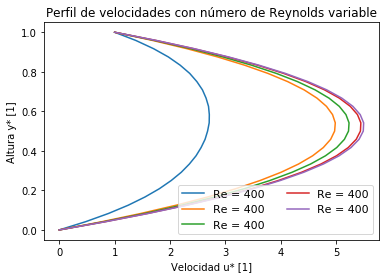

In [33]:
# d) Estudiar el criterio de convergencia

# Insertamos un criterio de convergencia que será multiplicado por 1x10^(-3)

P1 = Couette(25, 400, -0.1, criteria=10)
P2 = Couette(25, 400, -0.1, criteria=1)
P3 = Couette(25, 400, -0.1, criteria=0.5)
P4 = Couette(25, 400, -0.1, criteria=0.1)
P5 = Couette(25, 400, -0.1, criteria=0.01)

P1.graf_perfil()
P2.graf_perfil()
P3.graf_perfil()
P4.graf_perfil()
P5.graf_perfil()

#cplt.savefig('Comparación criterio de convergencia.png')

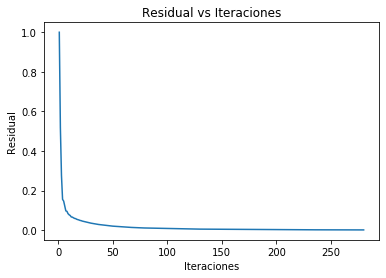

In [47]:
# e) Presentar una gráfica del residual contra el número de iteraciones.

Res = Couette(25, 400, -0.1, criteria=1)

Res.graf_res()

#plt.savefig('Residual vs Iteraciones.png')